# Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as mp

# Prepare Data

In [5]:
# Create dataframe
data = pd.read_csv('https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-Final-Project-Ace/main/data/Queried_Data/Remote%20Work%20Google%20Trends%20-%20Sheet1.csv')
df = pd.DataFrame(data)

# Rename Variacles
df=df.rename(columns={"remote work: (United States)": "Volume"})
df=df.rename(columns={"Week": "Date"})
# Prepare variables
df['Date'] = pd.to_datetime(df['Date'])
df['Volume'] = df['Volume'].astype(int)

x = df['Date']
y = df['Volume']

# Display data
df.head(232)

,Date,Volume
0,2018-03-04,28
1,2018-03-11,34
2,2018-03-18,32
3,2018-03-25,32
4,2018-04-01,30
...,...,...
227,2022-07-10,94
228,2022-07-17,100
229,2022-07-24,90
230,2022-07-31,93


# Establish Subsets

In [26]:
before_covid = df[df['Date'] < '2020-03-12']
after_covid = df[df['Date'] >= '2020-03-12']

# Prepare Regression Lines

In [27]:
before_covid_fit = np.polyfit(before_covid.index, before_covid['Volume'], 1)
before_covid_line = np.poly1d(before_covid_fit)

after_covid_fit = np.polyfit(after_covid.index, after_covid['Volume'], 1)
after_covid_line = np.poly1d(after_covid_fit)

# Plot Graph

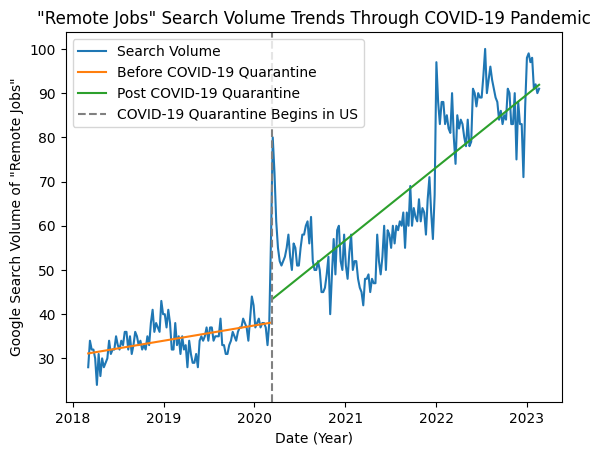

In [29]:
# Plot queried data
plt.plot(x, y, label='Search Volume')

# Plot regression lines
plt.plot(before_covid['Date'], before_covid_line(before_covid.index), label='Before COVID-19 Quarantine')
plt.plot(after_covid['Date'], after_covid_line(after_covid.index), label='Post COVID-19 Quarantine')

# Plot events
plt.axvline(x=pd.to_datetime('2020-03-12'), color='gray', linestyle='--', label='COVID-19 Quarantine Begins in US')

# Add legend and labels
plt.legend()
plt.title('"Remote Jobs" Search Volume Trends Through COVID-19 Pandemic')
plt.xlabel('Date (Year)')
plt.ylabel('Google Search Volume of "Remote Jobs"')

# Generate graph
plt.show()